<a href="https://colab.research.google.com/github/possomartin/Notebooks/blob/main/Progreso_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import seaborn as sns;

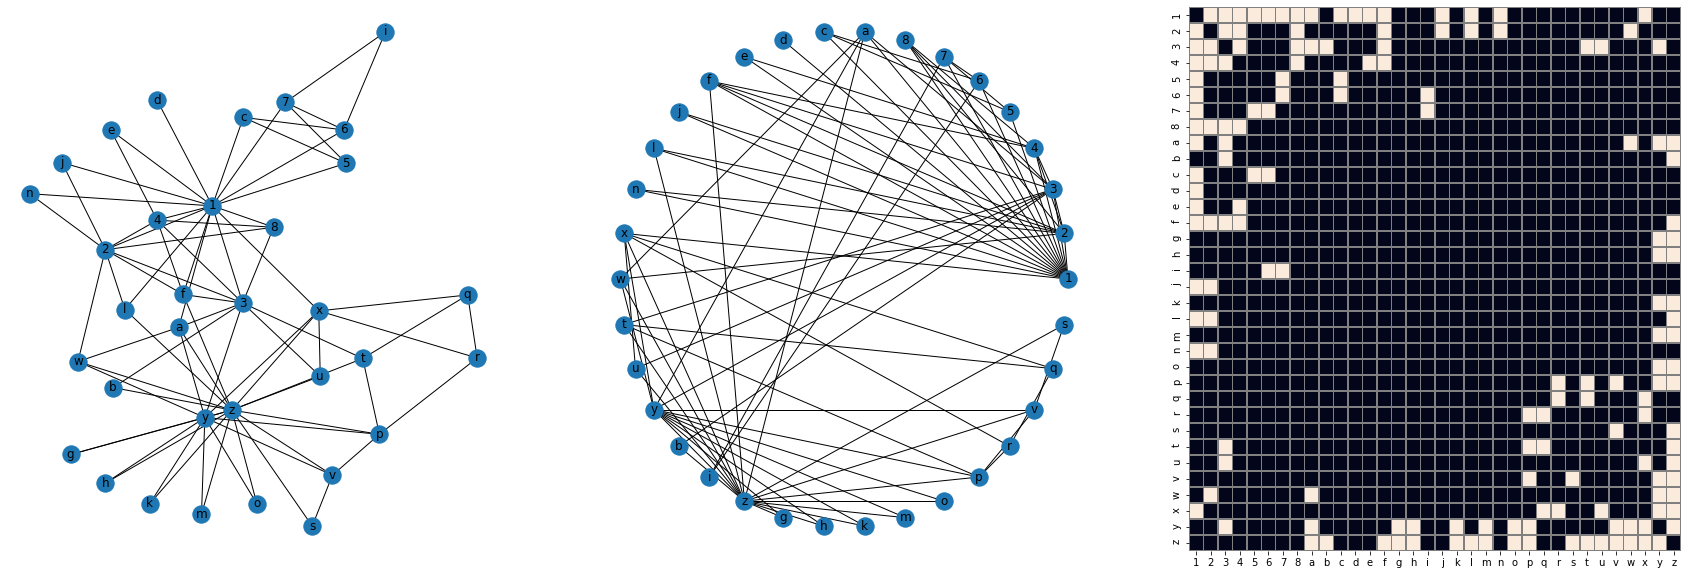

In [ ]:
columns = ['from', 'to']
df = pd.read_csv('https://raw.githubusercontent.com/marsgr6/r-scripts/master/data/graph_ms202120.csv', usecols=columns)
df.columns = df.columns.astype(str)
G = nx.from_pandas_edgelist(df, source='from', target='to')
A = nx.adjacency_matrix(G).todense()

Nodes_List = list(G.nodes)


Matrix = pd.DataFrame(A, index = G.nodes, columns = G.nodes)
Matrix = Matrix.sort_index(axis=1)
Matrix = Matrix.sort_index()

f = plt.figure(figsize=(30, 10))
f.add_subplot(131)
nx.draw_kamada_kawai(G, with_labels=True)
f.add_subplot(132)
nx.draw_circular(G, with_labels=True)
f.add_subplot(133)
ax = sns.heatmap(Matrix, linewidths=0.5, linecolor='gray', cbar=None)


In [ ]:
def random_walk(start_node = 'a'):
    prev_node = start_node
    n_steps = 0
    nodes = []
    while True:
        Neighbors = []
        nodes.append(prev_node)
        Neighbors = list(G.neighbors(prev_node))
        Neighbors.append('0')
        node = random.choice(Neighbors)
        if node == '0':
            break
        else:
            n_steps += 1
            prev_node = node
    return n_steps, nodes
#avrg_steps = sum(random_walk() for i in range(100000)) / 100000
#avrg_steps

In [ ]:
random_walk('a')

(7, ['a', 'z', 'k', 'y', 'z', 'a', 'z', 'w'])

In [ ]:
def simulation(n = 100, start_node = 'p'):
  paths = []
  distances = []
  sum = 0
  for i in range(n):
    n_steps, nodes = random_walk(start_node)
    sum += n_steps

    if ((nodes not in paths) and nodes):
      paths.append(nodes)

  avg_steps = sum / n

  print('Shortests Paths From Node ', {start_node})

  for letter in sorted(list(G.nodes)):
    shortest_paths = []
    shortest_walk = 10
    for i in paths:
      if letter == i[-1]:
        if (len(i) < shortest_walk):
          shortest_walk = len(i) - 1
          shortest_paths = i
    distances.append(shortest_walk)
    print({letter}, ':', shortest_walk, shortest_paths)
  print('Average Steps: ', avg_steps)
  return distances

In [ ]:
simulation(100000, 'p')

Shortests Paths From Node  {'p'}
{'1'} : 3 ['p', 'r', 'x', '1']
{'2'} : 3 ['p', 'z', 'l', '2']
{'3'} : 2 ['p', 'y', '3']
{'4'} : 3 ['p', 'z', 'f', '4']
{'5'} : 4 ['p', 'y', 'a', '1', '5']
{'6'} : 5 ['p', 'z', 'a', '1', 'c', '6']
{'7'} : 4 ['p', 't', '3', '1', '7']
{'8'} : 3 ['p', 't', '3', '8']
{'a'} : 2 ['p', 'z', 'a']
{'b'} : 2 ['p', 'z', 'b']
{'c'} : 4 ['p', 'y', 'x', '1', 'c']
{'d'} : 4 ['p', 'y', '3', '1', 'd']
{'e'} : 5 ['p', 't', 'q', 'x', '1', 'e']
{'f'} : 2 ['p', 'z', 'f']
{'g'} : 2 ['p', 'z', 'g']
{'h'} : 2 ['p', 'y', 'h']
{'i'} : 5 ['p', 'z', 'a', '1', '7', 'i']
{'j'} : 5 ['p', 'v', 'z', 'f', '2', 'j']
{'k'} : 2 ['p', 'z', 'k']
{'l'} : 3 ['p', 'y', 'z', 'l']
{'m'} : 3 ['p', 'y', 'z', 'm']
{'n'} : 4 ['p', 'y', '3', '2', 'n']
{'o'} : 3 ['p', 't', 'z', 'o']
{'p'} : 0 ['p']
{'q'} : 2 ['p', 'r', 'q']
{'r'} : 1 ['p', 'r']
{'s'} : 2 ['p', 'v', 's']
{'t'} : 1 ['p', 't']
{'u'} : 2 ['p', 'z', 'u']
{'v'} : 1 ['p', 'v']
{'w'} : 3 ['p', 'v', 'y', 'w']
{'x'} : 2 ['p', 'r', 'x']
{'y'} : 1 

[3,
 3,
 2,
 3,
 4,
 5,
 4,
 3,
 2,
 2,
 4,
 4,
 5,
 2,
 2,
 2,
 5,
 5,
 2,
 3,
 3,
 4,
 3,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 3,
 2,
 1,
 1]

Shortests Paths From Node  {'1'}
{'1'} : 0 ['1']
{'2'} : 1 ['1', '2']
{'3'} : 2 ['1', '2', '3']
{'4'} : 2 ['1', 'f', '4']
{'5'} : 2 ['1', '7', '5']
{'6'} : 1 ['1', '6']
{'7'} : 1 ['1', '7']
{'8'} : 1 ['1', '8']
{'a'} : 1 ['1', 'a']
{'b'} : 2 ['1', '3', 'b']
{'c'} : 1 ['1', 'c']
{'d'} : 1 ['1', 'd']
{'e'} : 1 ['1', 'e']
{'f'} : 1 ['1', 'f']
{'g'} : 3 ['1', 'f', 'z', 'g']
{'h'} : 3 ['1', 'x', 'y', 'h']
{'i'} : 3 ['1', '6', '7', 'i']
{'j'} : 2 ['1', '2', 'j']
{'k'} : 3 ['1', 'l', 'z', 'k']
{'l'} : 1 ['1', 'l']
{'m'} : 3 ['1', 'f', 'z', 'm']
{'n'} : 1 ['1', 'n']
{'o'} : 3 ['1', 'l', 'z', 'o']
{'p'} : 3 ['1', 'a', 'z', 'p']
{'q'} : 3 ['1', 'x', 'r', 'q']
{'r'} : 2 ['1', 'x', 'r']
{'s'} : 3 ['1', 'a', 'z', 's']
{'t'} : 2 ['1', '3', 't']
{'u'} : 3 ['1', 'l', 'z', 'u']
{'v'} : 4 ['1', 'x', 'r', 'p', 'v']
{'w'} : 2 ['1', '2', 'w']
{'x'} : 1 ['1', 'x']
{'y'} : 2 ['1', '3', 'y']
{'z'} : 2 ['1', 'a', 'z']
Average Steps:  5.30928
Shortests Paths From Node  {'2'}
{'1'} : 2 ['2', '8', '1']
{'2'} : 0 

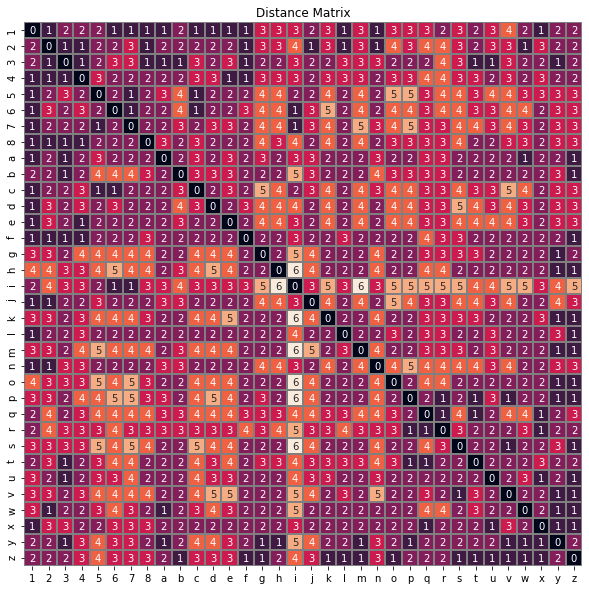

In [ ]:
Matrix_distances = []
for letter in sorted(list(G.nodes)):
  Matrix_distances.append(simulation(100000, letter))

df_Matrix = pd.DataFrame(data = Matrix_distances, index = sorted(list(G.nodes)), columns = sorted(list(G.nodes)))

plt.figure(figsize=(10,10))
plt.title('Distance Matrix')
sns.heatmap(df_Matrix, cbar=False, linecolor='gray', linewidths=1, annot=True)